<img src="https://logos-world.net/wp-content/uploads/2020/09/Starbucks-Emblem.png" 
     width="550" 
     height="300" />
## Introduction

Congratulations! You've been hired as a data analysis intern at Starbucks - the world's largest coffeehouse chain (you may have heard of it)! Starbucks is opening a new location and wants to tailor **different** advertisements to **different** customers. 

After meeting with the Starbucks marketing manager, you learn that the current marketing efforts are not getting the expected return-on-investment (ROI). The manager believes the reason for this is that the marketing team doesn't have a good grasp of their customers. They need to be able to better *segment their customers* based on their shopping habits and potential value to Starbucks, so that they can effectively target their marketing and make the best use of their advertising dollars. This is where you come in!

The marketing manager asks you to do an RFM analysis. RFM stands for **R**ecency, **F**requency, and **M**onetary. It is a marketing technique used to determine quantitatively (with numbers) which customers are the best ones to focus on. The analysis examines how recently a customer has made a purchase (recency), how often they purchase (frequency), and how much money the customer has spent (monetary).

You will be running this analysis on a data set from Starbucks that captures details about their customers.

**please read the instructions carefully!**

## Part I: Setting Up For Analysis

![](https://media.giphy.com/media/pObQUeN7IK3yLvxQlE/giphy-downsized-large.gif)

The first thing we need to do when working with data in Python is to get our environment set up, and to load in the data for a preliminary inspection.

### Task 1

Import the `numpy`, `pandas`, and `plotly.express` libraries.

In [11]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import plotly.express as px

### Task 2

The data you will be working with has been stored in a CSV file, called `starbucks_purchases.csv`. 

**A.** Load this data file from the datasets folder into a pandas DataFrame named `raw_df`.

**B.** Print the number of rows and columns in the DataFrame by using `shape`. 

**C.** Preview the first few rows of the data.

In [12]:
# Load dataset
raw_df = pd.read_csv('datasets/starbucks_purchases.csv')

# Print DataFrame shape
display(raw_df.shape)
# Preview DataFrame
display(raw_df.sample(5))

(138953, 4)

order_id                       customer_id  \
36353  4081f80e6044fd80a5a7709d5978c9c1  96f00d6a432547f8b906ed5d64758b67   
32663  fb6aa5ebd1824749bd584313576d69a3  b8397fc0004f4d70bb0374139d1c6ea3   
21988  4cadb5fec51f6c7564de2ad2b8ef0a78  9f2e7a00443644188720ca9edc74370c   
75796  25e2aef4fa5f612a5b7465fbe49877b6  1c90aacc726a4c6b8f8481465af0108e   
75093  ff211b8aa30b968ed1b91b321f992126  68275bf750654990bf5e7479aed56241   

       sales_amount purchase_date  
36353         19.73    2023/04/11  
32663         20.77    2023/03/29  
21988          8.49    2023/03/24  
75796          1.57    2023/04/08  
75093         17.36    2023/03/19

#### Data Dictionary

<span style='background :#DDD5F3'>You should see a DataFrame with `138,953` rows and `4` columns.</span>

Each row is an order made on the Starbucks app between October 2022 and May 2023. The columns contain the following information about the orders:

- **order_id** - The unique order number associated with the order.
- **customer_id** - The unique identifier of the customer who made the purchase. Customer ids can appear multiple times, once for each purchase they make on the app.
- **sales_amount** - The amount the customer spent on the order.
- **purchase_date** - The purchase date of the order in `yyyy/mm/dd` format.

## Part II: RFM Calculations

![](https://media.giphy.com/media/o8pzT9jQJcgRmAiIYT/giphy-downsized.gif)

Now that we have our data loaded in, let's calculate the Recency, Frequency, and Monetary metrics for each customer. For this dataset, these metrics look like:

- **Recency:** The number of days elapsed since the customer's most recent purchase.
- **Frequency:** The number of orders made by the customer. This is equivalent to the number of `order_id`'s associated with the customer.
- **Monetary:** The sum of the `sales_amount` values associated with the customer's orders.

### Task 3

We can calculate the Frequency and Monetary metrics directly from the data as given! Let's do that in this Task. 

You'll create a new DataFrame called `fm_df` that summarizes the `raw_df` DataFrame. You will *group* the data *by* each customer. Your summary should include:
- the total **count** of each `order_id` (to get the total number of purchases made). 
- the total **sum** spent per customer (use the `sales_amount` column)
- the **max** of the `purchase_date` to know when the last time that customer made an order.

**A.** First, create a dictionary mapping the column you want to aggregate to the aggregation you want to perform. 
<span style='background :#FFF59E'>**Hint:** This should be a dictionary with three keys!</span>

**B.** Use the `.groupby()` method on the `raw_df` DataFrame, together with the `.agg()` method and your dictionary from part **A.** to group your data by `customer_id`. Store the results in a new DataFrame named `fm_df`. 

<span style='background :#FFF59E'>**Tip**: There's a lot of data to tabulate, so this may take a little time to run. Don't panic if it takes more than just a few seconds to finish running.</span>

In [13]:
# Create a dictionary of column names and aggregation operations
aggregations ={
    'order_id':'count',
    'sales_amount':'sum',
    'purchase_date':'max'
}
# This will be used in your .groupby! 


# Group by customer ID and aggregate data, once you verify it works, store as fm_df
fm_df = raw_df.groupby('customer_id').agg(aggregations)

In [14]:
# Print DataFrame shape
display(fm_df.shape)

# Preview DataFrame
fm_df.sample(10)

(16578, 3)

order_id  sales_amount purchase_date
customer_id                                                           
5c0d7f5f799c4f808819e01db246e0a0         7         57.35    2023/04/26
8bf722542af848079c72dd4cde722d0e        14         24.62    2023/04/25
c059af92d5da4acb980fb8a8341ac69d         9        128.50    2023/04/25
87eec09bfcda4a95a7100b6e77f066a9         7        157.42    2023/04/27
f01b2d37aeb24bd981c3188ddbd4e659        14        172.70    2023/04/23
a7aca0114d2145a687d726e9d6f35b83        15        102.29    2023/04/25
f1ee8604afe84e1e8046ffdb1a4d5914         6         98.47    2023/04/29
2712ab2dbb1d412aa69adba136ef2f7c         4          9.11    2023/04/29
80df0308856f4207be404ae750b73399        17        138.71    2023/04/26
8f3d34f0adde4c659a1d8ab887637ba5         7         29.28    2023/04/26

<span style='background :#DDD5F3'>If done correctly, your new DataFrame `fm_df` should have `16,578` rows and `3` columns.</span>

### Task 4

The column names in the `fm_df` no longer make sense, since they don't have the same meaning as the original data. Let's fix that.

Rename the `order_id`, `sales_amount`, and `purchase_date` columns to be `frequency`, `monetary`, and `last_purchase_date`, respectively. Then preview the first ten rows.

<span style='background :#FFF59E'>**Note:** *When using the* `rename()` *method, you can specify the* `inplace=True` *parameter* so that you don't need to create a new DataFrame here. Just remember, this modifies the underlying data. If you run the cell more than once, you will run into an error, since you can't rename a column that has already been renamed! You'll have to run the notebook from the top again.</span>

In [15]:
# Rename columns
new_names = {'order_id': 'frequency', 'sales_amount': 'monetary', 'purchase_date': 'last_purchase_date'}
fm_df.rename(columns = new_names, inplace=True)
# Preview data
fm_df.sample(10)

frequency  monetary last_purchase_date
customer_id                                                             
43e90787bd3a47b1a6963bb87ffdfda5          4     25.87         2023/04/29
503678ffaf3f4034aa5101fc69d47c34          6     21.69         2023/04/27
66275050f9a44ba28c9008f6e284eeac          6    159.92         2023/04/29
0409df7f3af74e8c813d975fbd4ceb02          3     64.20         2023/04/27
d0a70db109564df1be5f0cfcf3296642          6     27.96         2023/04/25
f56c66ea1083462f9841bdfed32a71a1         13     47.64         2023/04/26
64f2b7a9b500432bb6977afd6b88e54d          3     10.74         2023/04/22
bdf1c179bfe648408b5a4ffa074ec5f6          7    140.12         2023/04/30
6959ae9c142a45e8ac7fe34505cc0d41          7    142.91         2023/04/23
86a00bb1fc2f4034b0f54374a6b42c1b          1     16.92         2023/04/28

In [17]:
# RUN THIS CELL - DO NOT MODIFY

# Resets the index so that `customer_id` is now a column in the data instead of the index.
fm_df = fm_df.reset_index()

### Task 5

You're almost there!

In this Task, you get to leverage work from another member of the data analytics team at Starbucks! Their work has been stored in a file named `recency.csv`, and shared with you. In it, you'll find the number of days that have passed between a given date in the table and May 2nd, 2023.

**A.** Load the `recency.csv` dataset from the datasets folder into a DataFrame called `recency`. Preview the first five rows. 

In [18]:
# Load the customer recency data 
cr_df = pd.read_csv('datasets/recency.csv')

# Preview the customer regency data
cr_df.sample(10)

date  recency
131  2022/12/22      131
103  2023/01/19      103
37   2023/03/26       37
328  2022/06/08      328
50   2023/03/13       50
357  2022/05/10      357
362  2022/05/05      362
292  2022/07/14      292
7    2023/04/25        7
181  2022/11/02      181

**B.** You need to join this `recency` DataFrame to the `fm_df` DataFrame, joining on the `date` field in the `recency` dataframe with the `last_purchase_date` field in the `fm_df`. Use `pd.merge()` to join `recency` to `fm_df`. Store the joined data in a DataFrame called `rfm_df`. Preview your joined data.

<span style='background :#FFF59E'>**Hint:** You will need to specify both the `left_on` and `right_on` parameters.</span>

<span style='background :#FFF59E'>**Pro Tip:** Using the `pd.merge()` function with `fm_df` as the first paramter, both a left join and an inner join will yield the same (correct) result! Do you know why?</span>

In [19]:
# Join fm_df with the recency DataFrame
rfm_df = pd.merge(fm_df, cr_df, left_on='last_purchase_date', right_on='date', how='inner')
# Preview joined data
rfm_df

index                       customer_id  frequency  monetary  \
0          0  0009655768c64bdeb2e877511632db8f          8    127.60   
1          6  00426fe3ffde4c6b9cb9ad6d077a13ea         17     68.51   
2         15  00840a2ca5d2408e982d56544dc14ffd         17     62.93   
3         17  008d7088107b468893889da0ede0df5c          7     16.18   
4         27  00b3400e4ff64ee68ce9ada1d0c222f0         10    163.92   
...      ...                               ...        ...       ...   
16573  15911  f56aa449c91d4bf587d9268a5d04aa47          3      7.50   
16574  16494  fe97ae4e27154d1aad39ceab8c25c9ed          5      6.51   
16575   5075  4e22b76b899443baa4999b85cbdcec21          3      5.33   
16576   7596  756418e9da164ec9bd7af9886df13d2a          7    200.98   
16577  13120  c9cb085677a142878c7bed085d38975f         15     33.64   

      last_purchase_date        date  recency  
0             2023/04/26  2023/04/26        6  
1             2023/04/26  2023/04/26        6  
2             2023/04/26  2023/04/26        6  
3             2023/04/26  2023/04/26        6  
4             2023/04/26  2023/04/26        6  
...                  ...         ...      ...  
16573         2023/04/20  2023/04/20       12  
16574         2023/04/20  2023/04/20       12  
16575         2023/04/17  2023/04/17       15  
16576         2023/04/17  2023/04/17       15  
16577         2023/04/17  2023/04/17       15  

[16578 rows x 7 columns]

<span style='background :#DDD5F3'>If done correctly, the number of rows should be the same as before, `16,578` but now with a total of `6` columns.</span>

### Task 6

The two columns, `date` and `last_purchase_date` are no longer relevant. We have everything else we need in the other columns. Let's drop those from the dataset.

In [20]:
# drop the date and last_purchase_date columns in rfm_df
rfm_df.drop(columns=['date', 'last_purchase_date'])

# preview data to ensure columns were dropped


index                       customer_id  frequency  monetary  recency
0          0  0009655768c64bdeb2e877511632db8f          8    127.60        6
1          6  00426fe3ffde4c6b9cb9ad6d077a13ea         17     68.51        6
2         15  00840a2ca5d2408e982d56544dc14ffd         17     62.93        6
3         17  008d7088107b468893889da0ede0df5c          7     16.18        6
4         27  00b3400e4ff64ee68ce9ada1d0c222f0         10    163.92        6
...      ...                               ...        ...       ...      ...
16573  15911  f56aa449c91d4bf587d9268a5d04aa47          3      7.50       12
16574  16494  fe97ae4e27154d1aad39ceab8c25c9ed          5      6.51       12
16575   5075  4e22b76b899443baa4999b85cbdcec21          3      5.33       15
16576   7596  756418e9da164ec9bd7af9886df13d2a          7    200.98       15
16577  13120  c9cb085677a142878c7bed085d38975f         15     33.64       15

[16578 rows x 5 columns]

## Part III: Frequency Analysis

![](https://media.giphy.com/media/l2RdUvClCHDTvNnU2j/giphy.gif)

Great work on getting the data all wrangled together! There is a lot to analyze here, but that's why you work on a team so that you can each tackle certain parts before bringing it all back together. 

For the remainder of the project, you're going to focus only the "F" in RFM. Other data analysts will tackle the R and M. (and you can even do it too in the LevelUp!)

### Task 7
Let's start out with a quick visualization of the *distribution*, or shape, of the frequency metric so that Starbucks can better understand just how often does their customers make purchases.

**A.** Use the `.histogram` function from Plotly to create a histogram of the `frequency` column of your RFM DataFrame. Add a title. 

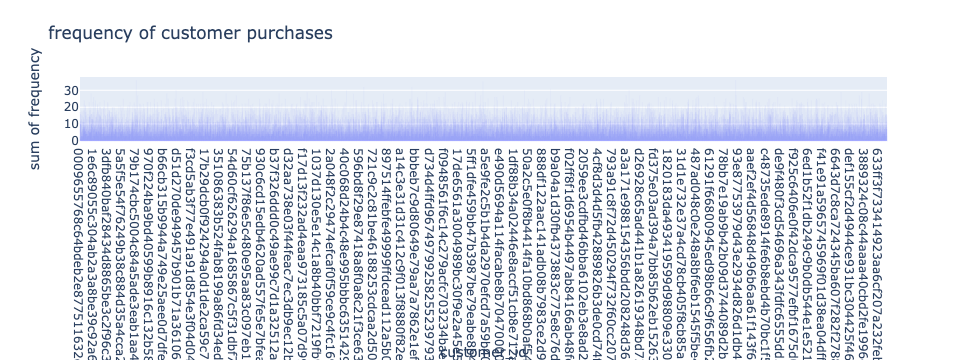

In [21]:
# Create a histogram of frequency 
px.histogram(rfm_df, title = 'frequency of customer purchases', y = 'frequency', x = 'customer_id')
# add a title


**B.** What does this `frequency` histogram tell us about the shopping patterns of most customers?

This graph is hard to read since it is displaying all customer data, but we can see there are few outliers it seems. most people have a sum of frequency around 20.


## Task 8
In RFM analysis, each factor is given a letter grade based on its value. For Frequency, a customer who make frequent purchases would be given an "A" grade, while those who make purchases less often would be given lower grades.

The marketing department at Starbucks has defined cut-off points for each letter grade, based on the number of purchases each customer has made over a given period of time. They've decided: 
  - More than 11 purchases is an A <br>
  - More than 7 purchases (but less than 11) is a B <br>
  - More than 5 purchases (but less than 7) is a C <br>
  - Less than 5 is a D <br>

You need to write a function that reads in the frequency value and uses `if`/`elif`/`else` statements to compare the value to the cut-off points and assign a grade. For example, `if` the frequency value is larger than 11, the function should assign A for the letter grade. 

In the cell below, you'll find starter code for the user-defined function called `frequency_grade`. Complete the code with `if`/`elif`/`else` statements.  

Make sure you run the cell when you've completed the function!

In [22]:
def frequency_grade(frequency): 
    letter_grade = 'E'
    '''
    Given a frequency value, function compares the value to 
    the frequency grading scale and returns the appropriate
    grade. 
    '''
    # check if frequency less than or equal to 5
    if frequency <= 5:
        # if so, assign letter grade D
        letter_grade = 'D'
    # check if frequency is less than or equal to 7 
    elif frequency <= 7:
        # if so, assign letter grade C
        letter_grade = 'C'
    # check if frequency is less than or equal to 11
    elif frequency <= 11:
        # if so, assign letter grade B
        letter_grade = 'B'
    # otherwise, assign letter grade A
    else:
        letter_grade = 'A'
        
    # return letter grade
    return(letter_grade)

Great! Let's `apply` this function to the `rfm_df`. No need to modify anything in the following cell, just run it!

In [23]:
# RUN THIS CELL - Do Not Modify!

# apply frequncy_grade to rfm_df 
rfm_df['frequency_grade'] = rfm_df['frequency'].apply(frequency_grade)

# preview DataFrame
rfm_df.head()

index                       customer_id  frequency  monetary  \
0      0  0009655768c64bdeb2e877511632db8f          8    127.60   
1      6  00426fe3ffde4c6b9cb9ad6d077a13ea         17     68.51   
2     15  00840a2ca5d2408e982d56544dc14ffd         17     62.93   
3     17  008d7088107b468893889da0ede0df5c          7     16.18   
4     27  00b3400e4ff64ee68ce9ada1d0c222f0         10    163.92   

  last_purchase_date        date  recency frequency_grade  
0         2023/04/26  2023/04/26        6               B  
1         2023/04/26  2023/04/26        6               A  
2         2023/04/26  2023/04/26        6               A  
3         2023/04/26  2023/04/26        6               C  
4         2023/04/26  2023/04/26        6               B

### Task 9

The marketing team has two final asks from you: 

Can you create a bar chart illustrating the frequency grades assigned to the Starbucks customer base, as part of the RFM analysis, and advise them on a marketing strategy? 

**A.** Use the `.histogram()` function to create a bar chart of each frequency grade. Make sure to give your chart a title and label the horizontal and vertical axes!

<span style='background :#FFF59E'>**Pro Tip:** Add the following argument in your `px.histogram` function to order the bars by grade: <br>
>`category_orders = {'frequency_grade': ['A', 'B', 'C', 'D']}`</span>

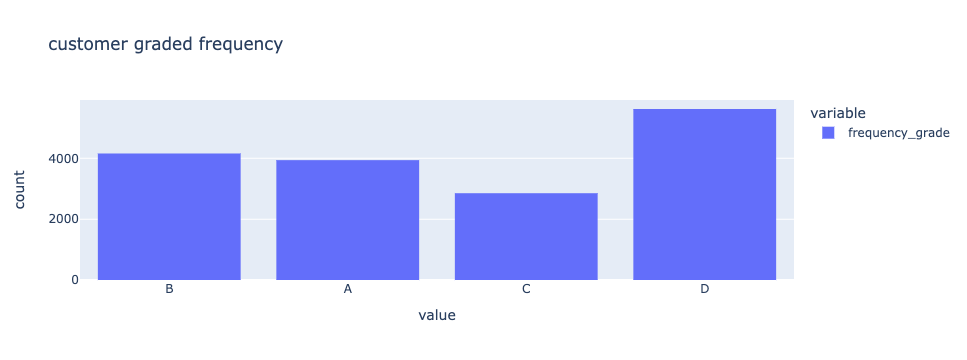

In [25]:
# Create a bar chart of total customer spending by grade
category_orders = {'frequency_grade': ['A','B','C','D']}
px.histogram(rfm_df, title = 'customer graded frequency', x = category_orders,)

**B.** Summarize, for the marketing team, what this chart represents. What marketing strategy can you offer so that Starbucks customers in the 'D' grade move toward higher frequency grades? 

<span style='background :#FFF59E'>**Remember**: Since these are all users on the app, you can customize messages to them based on any splitting of the data you would like.</span>

I feel you could offer rewards to people like small ticks in price reduction per order. Or something like on social media where repeat and consectutive orders will give a price reduction and everyday you keep the score you up it, it could increase for small things even like getting water by tracking the user and if they are in the starbucks parking lot it would count. Max it at 50% or half off before it resets. This could cause people to go to starbucks more even if they dont purchase it would build it up and eventually they will buy a coffee. However I think it would be better to backtrack customer_id and email the people and see why. It could be a starbucks near them is under rennovation or not up to quality and see if there are other factors in why people dont show.

## LevelUp

![](https://media.giphy.com/media/E6B4aFk4akYRW/giphy.gif)

Earlier in the project, you were only focused on only one feature, `frequency`. In these LevelUp tasks, you will be looking at the entire RFM data to see all the different ways your customers are segmented.

In the `datasets` folder you will find the `full_rfm_data.csv`. Load that into your Jupyter Notebooks so you can begin your analysis!

In [30]:
# Load the full rfm data and store it in a variable called `full_rfm`
full_rfm = pd.read_csv('datasets/full_rfm_data.csv')

In [32]:
# Preview a sample with 10 rows of the data frame
full_rfm.sample(10)

customer_id  recency  frequency  monetary R_grade  \
13022  c8463fa0d79b434b960ce94253b68221        5          9     26.64       C   
9661   944468eb385c404d9d3f65fe9330215b        6          7    143.28       B   
12852  c5c124fa2145402da172d151c2acba5e        6          9    215.44       B   
10181  9bef81e848e94dfc87167f885247b180        8          6    114.84       A   
15032  e75f51ded91c45728e8dca0ae04e8e22        3          8    159.77       D   
7944   7a9d39b1142e4f1898fdf2358958197a        3          6     24.53       D   
6386   62b82a6507554dfca4ca1c9775f1fabe        0          6     22.69       D   
10879  a611a96c65a74267a8fa133c90d3f76c        3          6    138.12       D   
3755   3a34a62146b040e3ac783d58c2b69bfe        2          4     16.36       D   
5783   594bea74b95e4cc1b6a2f95550c62b6e        6          6     21.33       B   

      F_grade M_grade RFM_grade  
13022       B       C       CBC  
9661        C       B       BCB  
12852       B       A       BBA  
10181       C       B       ACB  
15032       B       A       DBA  
7944        C       C       DCC  
6386        C       D       DCD  
10879       C       B       DCB  
3755        D       D       DDD  
5783        C       D       BCD

As you can see, this dataframe has a few more columns than the work you did earlier. A few things to notice:

* The `R_grade`, `F_grade`, and `M_grade` columns represent the recency grade, frequency grade, and monetary grade, respectively.
* The `RFM_grade` is the combination of the 3 individual grades.

The `RFM_grade` is what allows you to more finely segment your customers instead of looking at only individual grades.

Let's investigate the different categories. First, run the cell below. It will make your visualization easier to read.

In [33]:
# RUN THIS CELL - Do Not Modify

# Takes all the unique RFM grades and sorts them for easier viewing
grade_orders = list(full_rfm['RFM_grade'].unique())
grade_orders.sort()

Use the a `.histogram()` function to create a bar chart of all the RFM_grades. 

<span style='background :#FFF59E'>**Pro Tip:** Add the following argument in your `px.histogram` function to order the bars by grade: <br>
>`category_orders = {'RFM_grade': grade_orders}`</span>

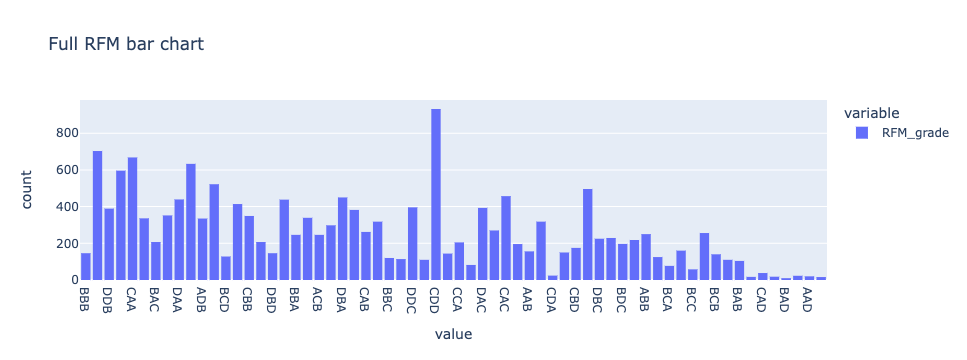

In [37]:
# Create a bar chart of the RFM grades
category_orders = {'RFM_grade': grade_orders}
px.histogram(full_rfm, title = 'Full RFM bar chart', x = category_orders)

Using the chart to guide you answer the following questions: 

* What 2 segments (i.e. `RFM_grade`) do you think makes the most sense for Starbucks to focus on? 
* Why did you choose those 2 segments?
* What marketing tactics would you suggest using to move them into a "higher" grade category?


<span style='background :#FFF59E'>**Note**: This a very open-ended question. There is no right or wrong answer, but you should be referencing the data to guide your decisions.</span>

CDD and DDB
I choose CDD because it seems to contain a high amout of users in that one category. Then DDB because it is also tall, but on the very low end of profit, thus if thoes people move up in the rating then they are giving more business to the company
offering small incetives. customers will respond somewhat no matter the size. Simply bring to the place by tracking users and when they are within x feet give them a daily bonus that builds, and maxes at 50%. Odds are if they drive all that way they will buy something, if not they invest all that time for a 50% reduction in price will appeal to them and make them feel the pressure to use it. Set it to hit 50% like once a month so that users dont feel like it takes a lot and using it isnt massive punitive to the users. It also create more traffic around the business which will draw more eyes, and hopefully more customers.

That's it! You did it! These skills are extremely valuable and give you a solid grasp of how they are applied in a work setting.

Congratulations on getting this far!

Now, update that resume and go celebrate!